In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
#read data
df = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

In [28]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
mlr = LinearRegression()
model=mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

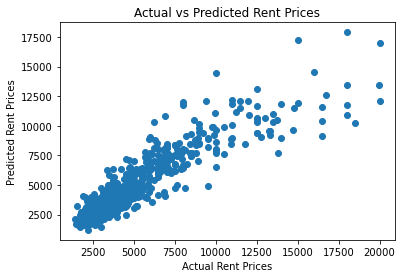

In [29]:
#Visualization
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Rent Prices')
plt.ylabel('Predicted Rent Prices')
plt.title('Actual vs Predicted Rent Prices')
plt.show()

In [30]:
print("Regression model coefficients: " +str(mlr.coef_))
print("Regression model intercept: " + str(mlr.intercept_))

Regression model coefficients: [[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]
Regression model intercept: [-344.68587986]


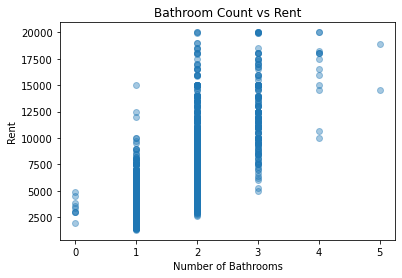

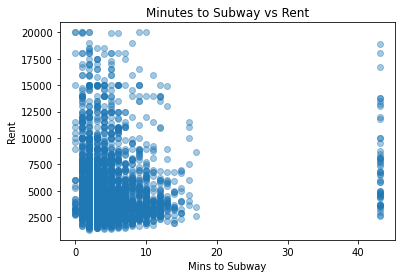

In [31]:
#Explore correlation between individual features and rent
plt.figure()
plt.scatter(df.size_sqft, df.rent, alpha=0.4)
plt.xlabel('Size - sqft')
plt.ylabel('Rent')
plt.title('Apartment Size vs Rent')
plt.show()

plt.figure()
plt.scatter(df.min_to_subway, df.rent, alpha=0.4)
plt.xlabel('Mins to Subway')
plt.ylabel('Rent')
plt.title('Minutes to Subway vs Rent')
plt.show()

In [32]:
#Evaluate model accuracy
print("Training set score: " + str(mlr.score(x_train, y_train)))
print("Testing set score: " + str(mlr.score(x_test, y_test)))

Training set score: 0.7725460559817883
Testing set score: 0.805037197535764


In [33]:
#Remove features with lowest coefficients to attempt to increase accuracy
#4.79976742 associated with size in sqft, -7.58272473 associated with building age in years
x_modified=x.drop(['size_sqft', 'building_age_yrs'], axis=1)

In [34]:
x_train_mod, x_test_mod, y_train_mod, y_test_mod = train_test_split(x_modified, y, train_size = 0.8, test_size = 0.2, random_state=6)
model_mod=mlr.fit(x_train_mod, y_train_mod)
y_predict_mod = mlr.predict(x_test_mod)

In [35]:
#Evaluate model accuracy
print("Training set score: " + str(mlr.score(x_train_mod, y_train_mod)))
print("Testing set score: " + str(mlr.score(x_test_mod, y_test_mod)))

Training set score: 0.6262190148259476
Testing set score: 0.6395410920562394


In [36]:
#score lower than previous, tnerefore keep features